In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from gensim.models import Word2Vec, FastText

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
print(tf.__version__)

2.2.0


In [ ]:
labeled_data = pd.read_csv("./data/labeledTrainData.tsv", sep="\t")
test_data = pd.read_csv("./data/testData.tsv", sep="\t")

# Some EDA

In [ ]:
labeled_data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [ ]:
print("Percentage of positive sentiments: ", labeled_data["sentiment"].sum() / len(labeled_data))

Percentage of positive sentiments:  0.5


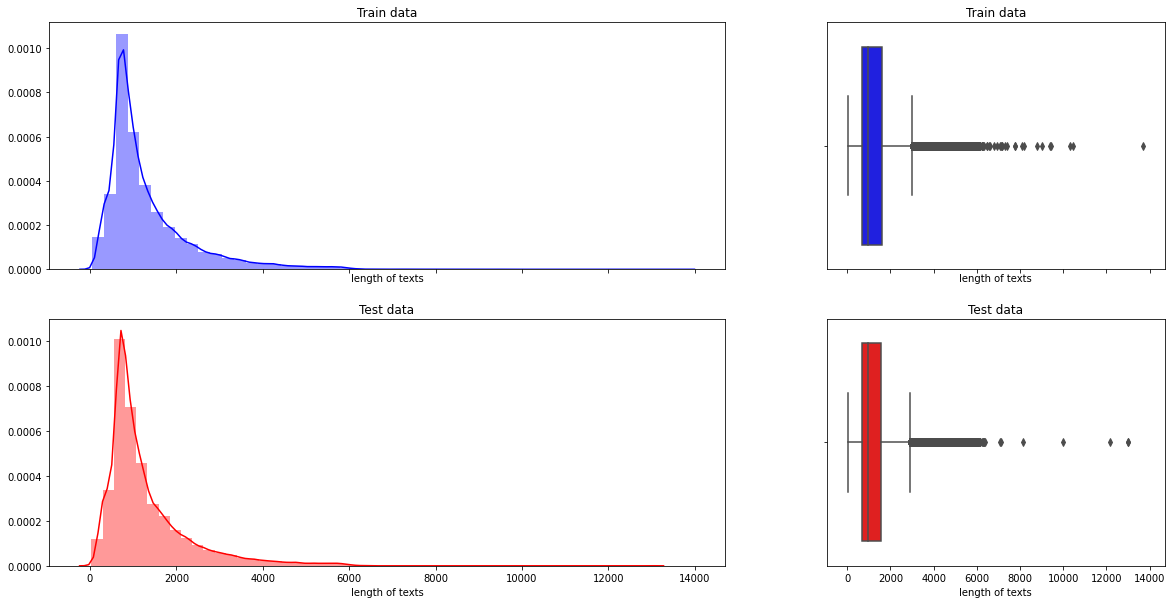

count    25000.000000
mean      1327.710560
std       1005.239246
min         52.000000
25%        703.000000
50%        981.000000
75%       1617.000000
max      13708.000000
Name: review, dtype: float64
count    25000.000000
mean      1296.443280
std        978.123328
min         32.000000
25%        697.000000
50%        964.500000
75%       1575.000000
max      13004.000000
Name: review, dtype: float64


In [ ]:
import matplotlib.gridspec as gridspec

length_of_texts = labeled_data["review"].apply(len)
length_of_test_texts = test_data["review"].apply(len)

_, axes = plt.subplots(2,2,figsize = (20,10), sharex = True, gridspec_kw = {"width_ratios":[2,1]})

sns.distplot(length_of_texts, color = "b", ax = axes[0,0]).set(xlabel = "length of texts", title = "Train data")
sns.distplot(length_of_test_texts, color = "r", ax = axes[1,0]).set(xlabel = "length of texts", title = "Test data")
sns.boxplot(length_of_texts, color = "b", ax = axes[0,1]).set(xlabel = "length of texts", title = "Train data")
sns.boxplot(length_of_test_texts, color = "r", ax = axes[1,1]).set(xlabel = "length of texts", title = "Test data")
plt.show()

print(length_of_texts.describe())
print(length_of_test_texts.describe())

In [ ]:
print(labeled_data.isnull().sum())
print(test_data.isnull().sum())

id           0
sentiment    0
review       0
dtype: int64
id        0
review    0
dtype: int64


# Text Preprocessing

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

texts = labeled_data.review.copy()
test_texts = test_data.review.copy()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def text_preprocess_tokenize(data, tokenizer = RegexpTokenizer(r'\w+'), stopWords = stopwords.words('english'), stemmer = nltk.stem.porter.PorterStemmer()):
    """
    data == pd.Series( of texts )
    """
    
    
    # small capital
    data = data.apply(lambda x: x.lower())
    
    # tokenize by reading only words
    data = data.apply(tokenizer.tokenize)
    
    # exclude stopwords
    f = lambda x: [i for i in x if i not in stopWords]
    data = data.apply(f)
    
    data = data.apply(lambda i: [*map(stemmer.stem, i)])
    return data

texts = text_preprocess_tokenize(texts)
test_texts = text_preprocess_tokenize(test_texts)

In [ ]:
texts_unique = texts.explode().value_counts()
test_texts_unique = test_texts.explode().value_counts()

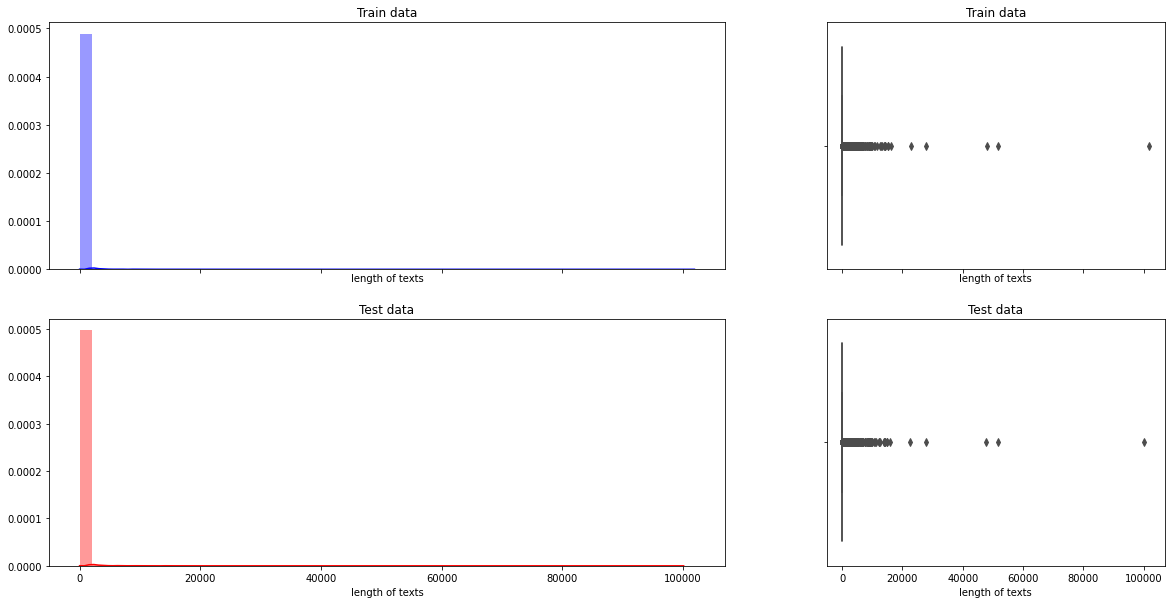

 Number of unique words in Train data:  51265
 Number of unique words in Test data:  50501
count     51265.000000
mean         60.992178
std         690.811310
min           1.000000
25%           1.000000
50%           3.000000
75%          12.000000
max      101871.000000
Name: review, dtype: float64
count     51265.000000
mean         60.992178
std         690.811310
min           1.000000
25%           1.000000
50%           3.000000
75%          12.000000
max      101871.000000
Name: review, dtype: float64
br         101871
movi        51717
film        48207
one         27749
like        22806
time        16198
good        15367
make        15212
charact     14184
get         14142
Name: review, dtype: int64
mazzucato     1
shumach       1
auie          1
crushingli    1
chunkhead     1
topactor      1
quida         1
chitter       1
psycopath     1
thunderjet    1
Name: review, dtype: int64
br         100080
movi        51565
film        47680
one         27704
like        22404

In [ ]:
_, axes = plt.subplots(2,2,figsize = (20,10), sharex = True, gridspec_kw = {"width_ratios":[2,1]})

sns.distplot(texts_unique, color = "b", ax = axes[0,0]).set(xlabel = "length of texts", title = "Train data")
sns.distplot(test_texts_unique, color = "r", ax = axes[1,0]).set(xlabel = "length of texts", title = "Test data")
sns.boxplot(texts_unique, color = "b", ax = axes[0,1]).set(xlabel = "length of texts", title = "Train data")
sns.boxplot(test_texts_unique, color = "r", ax = axes[1,1]).set(xlabel = "length of texts", title = "Test data")
plt.show()


print(" Number of unique words in Train data: ", len(texts_unique))
print(" Number of unique words in Test data: ", len(test_texts_unique))

print(texts_unique.describe())
print(texts_unique.describe())
print(texts_unique.head(10))
print(texts_unique.tail(10))
print(test_texts_unique.head(10))
print(test_texts_unique.tail(10))

In [ ]:
for temp in [texts_unique, test_texts_unique]:
    print(temp.quantile(0.9))
    for i in range(10):
        print(" Number of unique words appearing more than {} times: {}".format((i*10)+1, len(temp[temp>(i*10)+1])))
        print(" Number of unique words appearing less than {} times: {}".format((i*2000)+1, len(temp[temp<(i*2000)+1])))

59.0
 Number of unique words appearing more than 1 times: 31608
 Number of unique words appearing less than 1 times: 0
 Number of unique words appearing more than 11 times: 13151
 Number of unique words appearing less than 2001 times: 51000
 Number of unique words appearing more than 21 times: 9403
 Number of unique words appearing less than 4001 times: 51174
 Number of unique words appearing more than 31 times: 7564
 Number of unique words appearing less than 6001 times: 51209
 Number of unique words appearing more than 41 times: 6401
 Number of unique words appearing less than 8001 times: 51230
 Number of unique words appearing more than 51 times: 5603
 Number of unique words appearing less than 10001 times: 51246
 Number of unique words appearing more than 61 times: 5007
 Number of unique words appearing less than 12001 times: 51250
 Number of unique words appearing more than 71 times: 4542
 Number of unique words appearing less than 14001 times: 51254
 Number of unique words appear

In [ ]:
def text_preprocess_exclude_by_freq(data, freq_low, freq_hi):
    val_cnt = data.explode().value_counts()
    exclude_list = val_cnt.index[( (val_cnt < freq_low) | (val_cnt > freq_hi) )]
    
    f = lambda x: [i for i in x if i not in exclude_list]
    data = data.apply(f)
    
    return data

In [ ]:
texts = text_preprocess_exclude_by_freq(texts, freq_low = 50, freq_hi = 10000)

test_texts = text_preprocess_exclude_by_freq(test_texts, freq_low = 50, freq_hi = 10000)

show           9878
much           9764
end            9655
peopl          9393
bad            9351
               ... 
ceil             50
roam             50
hmmm             50
conceit          50
palestinian      50
Name: review, Length: 5716, dtype: int64
Empty reveiws:  0
count    25000.000000
mean        96.336520
std         73.636048
min          2.000000
25%         50.000000
50%         71.000000
75%        118.000000
max       1096.000000
Name: review, dtype: float64


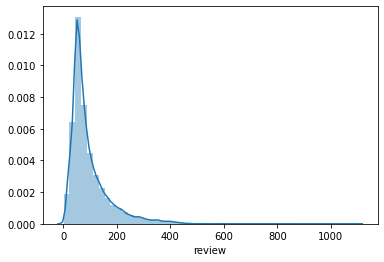

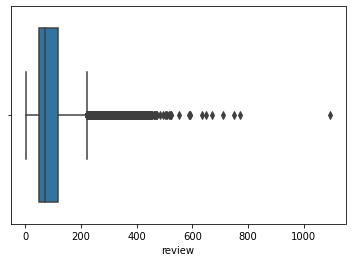

look       9896
much       9554
end        9445
great      9230
love       9194
           ... 
flatlin      50
sf           50
comet        50
vaniti       50
dustin       50
Name: review, Length: 5612, dtype: int64
Empty reveiws:  0
count    25000.000000
mean        93.912600
std         71.695096
min          2.000000
25%         50.000000
50%         70.000000
75%        115.000000
max        917.000000
Name: review, dtype: float64


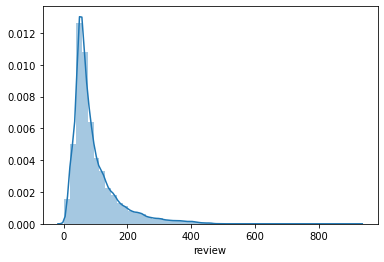

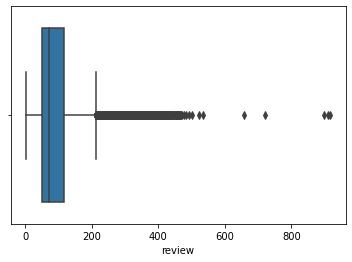

In [ ]:
# sanity check

for i in [texts, test_texts]:
    print(i.explode().value_counts())
    print("Empty reveiws: ", i.apply(lambda x: x == []).sum())
    print(i.apply(len).describe())
    sns.distplot(i.apply(len))
    plt.show()
    sns.boxplot(i.apply(len))
    plt.show()

In [ ]:
def vectorization(data, seq_len):    

    # Tokenization (tensorflow)
    xtokenizer = tf.keras.preprocessing.text.Tokenizer()
    xtokenizer.fit_on_texts(data)
    texts_numerized = xtokenizer.texts_to_sequences(data)
    
    texts_padded = tf.keras.preprocessing.sequence.pad_sequences(texts_numerized, padding="pre", maxlen=seq_len)

    wd2ix = xtokenizer.word_index
    ix2wd = xtokenizer.index_word
    
    return texts_numerized, texts_padded, wd2ix, ix2wd, xtokenizer

In [ ]:
# cut sequence length to 100 (approximately 75% quantile)
seq_len = 100

texts_numerized, texts_padded, texts_wd2ix, texts_ix2wd, texts_tokenizer = vectorization(texts, seq_len)

In [ ]:
print(" Number of unique words in Train data: ", texts_padded.max() + 1)

 Number of unique words in Train data:  5717


In [ ]:
print("GPUs : ", tf.config.experimental.list_physical_devices('GPU'))

GPUs :  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
y = labeled_data["sentiment"].copy()
cat_classes = 1
N = texts_padded.max() + 1
embedding_size = 200
input_length = seq_len
num_units = 30

#tf.debugging.set_log_device_placement(True)
with tf.device("/GPU:0"):

  model = tf.keras.Sequential([tf.keras.layers.Embedding(N, embedding_size)])

  model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = num_units)))

  model.add(tf.keras.layers.Dense(units = cat_classes))

  model.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

  history = model.fit(texts_padded, y, epochs = 50, batch_size = 1000, validation_split=0.25
                      , callbacks = [tf.keras.callbacks.EarlyStopping(patience=5, monitor="val_loss")]
                      )


print("Learning Finished !")

RuntimeError: ignored

# Submission

In [ ]:
test_texts_numerized = texts_tokenizer.texts_to_sequences(test_texts)

test_texts_padded = tf.keras.preprocessing.sequence.pad_sequences(test_texts_numerized, padding = "pre", maxlen = seq_len)

predictions = model.predict(test_texts_padded)

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AnonymousIteratorV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_distributed_function_8452 in device /job:localhost/replica:0/task:0

In [ ]:
predictions = (predictions > 0.5).astype(int).reshape(-1)

In [ ]:
predictions

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
submission = pd.read_csv("/kaggle/input/word2vec-nlp-tutorial/sampleSubmission.csv")

submission["sentiment"] = predictions

In [ ]:
submission.to_csv("submission_vanilla_lstm.csv", index = False)

In [ ]:
submission

,id,sentiment
0,12311_10,1
1,8348_2,0
2,5828_4,0
3,7186_2,0
4,12128_7,1
...,...,...
24995,2155_10,1
24996,59_10,1
24997,2531_1,0
24998,7772_8,1


# Training with Word2Vec and FastText (using gensim)

* Pretrain with word2vec / fasttext using gensim wrapper

In [ ]:
unlabeled_data = pd.read_csv("./data/unlabeledTrainData.tsv", sep="\t", error_bad_lines = False)

unlabeled_data.head()

b'Skipping line 43043: expected 2 fields, saw 3\n'


,id,review
0,9999_0,"Watching Time Chasers, it obvious that it was ..."
1,45057_0,I saw this film about 20 years ago and remembe...
2,15561_0,"Minor Spoilers<br /><br />In New York, Joan Ba..."
3,7161_0,I went to see this film with a great deal of e...
4,43971_0,"Yes, I agree with everyone on this site this m..."


In [ ]:
unlabeled_texts = unlabeled_data["review"].copy()
unlabeled_texts = text_preprocess_tokenize(unlabeled_texts)
unlabeled_texts = text_preprocess_exclude_by_freq(unlabeled_texts, freq_low = 50, freq_hi = 10000)

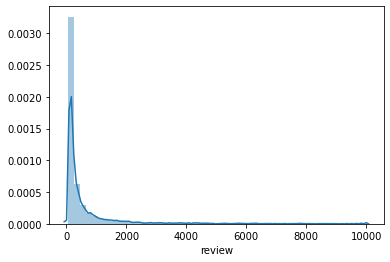

actual     9953
lot        9948
real       9770
guy        9332
live       9123
           ... 
unexcit      50
tremor       50
maggot       50
brag         50
engulf       50
Name: review, Length: 8565, dtype: int64


In [ ]:
sns.distplot(unlabeled_texts.explode().value_counts())
plt.show()

print(unlabeled_texts.explode().value_counts())

In [ ]:
unlabeled_with_test = pd.concat([unlabeled_texts, test_texts], ignore_index = True)

In [ ]:
embeddings = ["w2v_model", "w2v_model_ut", "ft_model", "ft_model_ut"]

In [ ]:
# Pre-train on unlabeled_texts + test_texts and training data (texts)
w2v_model_ut = Word2Vec(unlabeled_with_test, size = 200, workers = 4, window = 5, sg = 1)
w2v_model_ut.train(unlabeled_with_test, total_examples = len(unlabeled_with_test), epochs = 20)
w2v_model_ut.train(texts, total_examples = len(texts), epochs = 20)

(47755400, 48168260)

In [ ]:
# 사실 여기 pretraining이랑 fine-tuning과정이 완벽히 맞는건 같진 않은데 이거 보는 사람들 피드백 주면 고마울 것 같습니다. 
# 아래 모델 과정도 참조 바람

# W2V (Google)

# Pre-train on unlabeled_texts and training data (texts)
w2v_model = Word2Vec(unlabeled_texts, size = 200, workers = 4, window = 5, sg = 1)
w2v_model.train(unlabeled_texts, total_examples = len(unlabeled_texts), epochs = 20)
w2v_model.train(texts, total_examples = len(texts), epochs = 20)

# Pre-train on unlabeled_texts + test_texts and training data (texts)
w2v_model_ut = Word2Vec(unlabeled_with_test, size = 200, workers = 4, window = 5, sg = 1)
w2v_model_ut.train(unlabeled_with_test, total_examples = len(unlabeled_with_test), epochs = 20)
w2v_model_ut.train(texts, total_examples = len(texts), epochs = 20)

In [ ]:
# FastText (Facebook)

# Pre-train on unlabeled_texts and fine-tune on training data (texts)
ft_model = FastText(unlabeled_texts, size = 200, workers = 4, window = 5)
ft_model.train(unlabeled_texts, total_examples = len(unlabeled_texts), epochs = 20)

ft_model.train(texts, total_examples = len(texts), epochs = 20)

# Pre-train on unlabeled_texts + test_texts and fine-tune on training data (texts)
ft_model_ut = FastText(unlabeled_with_test, size = 200, workers = 4, window = 5)
ft_model_ut.train(unlabeled_with_test, total_examples = len(unlabeled_with_test), epochs = 20)

ft_model_ut.train(texts, total_examples = len(texts), epochs = 20)

In [ ]:
# Check learned embeddings

w2v_model.wv.most_similar("money")

## Use Multiprocessing for embeddings

In [ ]:
# from https://github.com/corazzon/KaggleStruggle/blob/master/word2vec-nlp-tutorial/KaggleWord2VecUtility.py

from multiprocessing import Pool


class multiprocessing(object):    
    
    # 참고 : https://gist.github.com/yong27/7869662
    # http://www.racketracer.com/2016/07/06/pandas-in-parallel/
    # 속도 개선을 위해 멀티 스레드로 작업하도록
    @staticmethod
    def _apply_df(args):
        df, func, kwargs = args
        return df.apply(func, **kwargs)
    
    @staticmethod
    def apply_by_multiprocessing(df, func, **kwargs):
        # 키워드 항목 중 workers 파라메터를 꺼냄
        workers = kwargs.pop('workers')
        # 위에서 가져온 workers 수로 프로세스 풀을 정의
        pool = Pool(processes=workers)
        # 실행할 함수와 데이터프레임을 워커의 수 만큼 나눠 작업
        result = pool.map(multiprocessing._apply_df, [(d, func, kwargs)
                for d in np.array_split(df, workers)])
        pool.close()
        # 작업 결과를 합쳐서 반환
        return pd.concat(result)

In [ ]:
# Multiprocessing for FastText and Word2Vec

model_result = dict()
for embed_model in [FastText(size = 200, window = 5), Word2Vec(size = 200, window = 5)]:
    mtp = multiprocessing()
    model_result[type(embed_model).__name__] = mtp.apply_by_multiprocessing(unlabeled_with_test, embed_model.train,
                                               epochs = 10, total_examples = len(unlabeled_with_test), workers = 4)


## 4 Pretrained Embeddings

1. word2vec (pretrain: unlabeled_texts, fine-tune: training texts)
2. word2vec (pretrain: unlabeled_texts+test_texts, fine-tune: training texts)
3. fasttext (pretrain: unlabeled_texts, fine-tune: training texts)
4. fasttext (pretrain: unlabeled_texts+test_texts, fine-tune: training texts)
5. Glove (?)

In [ ]:
# from https://www.kaggle.com/alexcherniuk/imdb-review-word2vec-bilstm-99-acc

# Embedding Layer 에서 trainable = False로 설정하면, gensim을 통해 얻은 embedding을 학습없이 그대로 사용 (이렇게 되면 fine-tuning이 아닌 것 같음)
# Embedding Layer 에서 trainable = True (default)로 설정하면, 첫 instantiating만 gensim을 통해 얻은 embedding을 사용 (이게 fine-tuning 이겠지?)
# 아래 모델에서는 freeze parameter로 fine-tuning (?) 제어
# 어떤 freeze방식이 적절한지 모르겠음


def vectorize_data(data, vocab: dict) -> list:
    keys = list(vocab.keys())
    filter_unknown = lambda word: vocab.get(word, None) is not None
    encode = lambda review: list(map(keys.index, filter(filter_unknown, review)))
    vectorized = list(map(encode, data))
    return vectorized


def build_and_train(texts_padded, y, embedding_matrix, input_length, epochs = 20, freeze_after = None, freeze_before = None):
    
    cat_classes = 1
    
    model = tf.keras.Sequential([tf.keras.layers.Embedding( input_dim = embedding_matrix.shape[0],
                                                            output_dim = embedding_matrix.shape[1],
                                                            input_length = input_length,
                                                            weights = [embedding_matrix],
                                                            trainable = True)])

    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units = 128, recurrent_dropout = 0.1)))

    model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Dense(units = 64))

    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Dense(units = cat_classes))

    optimizer = ["adam","rmsporp"]
    
    model.layers[0].trainable = not bool(freeze_before)
    
    model.compile(loss = "binary_crossentropy", optimizer = optimizer[0], metrics = ["accuracy"])
    
    if freeze_after:
        
        print("Training Embedding...")
        
        model.fit(texts_padded, y, epochs = freeze_after, batch_size = 1000, validation_split=0.25
                        , callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, monitor="val_loss")]
                        )
        
        print("Embedding frozen...")
        
        # freeze
        model.layers[0].trainable = False
        # compile again with frozen embeddings
        model.compile(loss = "binary_crossentropy", optimizer = optimizer[0], metrics = ["accuracy"])
        
        history = model.fit(texts_padded, y, epochs = (epochs-freeze_after), batch_size = 1000, validation_split=0.25
                        , callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, monitor="val_loss")]
                        )
    elif freeze_before:
        
        print("Embedding frozen...")
        
        model.fit(texts_padded, y, epochs = freeze_before, batch_size = 1000, validation_split=0.25
                        , callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, monitor="val_loss")]
                        )
        
        print("Training Embedding...")
        
        # unfreeze
        model.layers[0].trainable = True
        # compile again with frozen embeddings
        model.compile(loss = "binary_crossentropy", optimizer = optimizer[0], metrics = ["accuracy"])
        
        history = model.fit(texts_padded, y, epochs = (epochs-freeze_before), batch_size = 1000, validation_split=0.25
                        , callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, monitor="val_loss")]
                        )
    else:
        
        history = model.fit(texts_padded, y, epochs = epochs, batch_size = 1000, validation_split=0.25
                        , callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, monitor="val_loss")]
                        )

    print("Learning Finished !")
    
    return model, history

In [ ]:
y = labeled_data["sentiment"].copy()

In [ ]:
embedding_results = dict()
models = dict()
n_epochs = 50
freeze = 5

for e,i in enumerate(embeddings):
    print(embeddings, "-"*30)
    # tf.debugging.set_log_device_placement(True)
    embedding = eval(i)
    
    texts_numerized = vectorize_data(texts, embedding.wv.vocab)
    texts_padded = tf.keras.preprocessing.sequence.pad_sequences(texts_numerized, padding="pre", maxlen=seq_len)

    model, history = build_and_train(texts_padded = texts_padded, y = y, 
                                     embedding_matrix = embedding.wv.vectors, input_length = seq_len,
                                     epochs = n_epochs, freeze_before = freeze)
    models[i] = model
    embedding_results[i] = history.history